In [7]:
using GynC
using Colors
using Plots


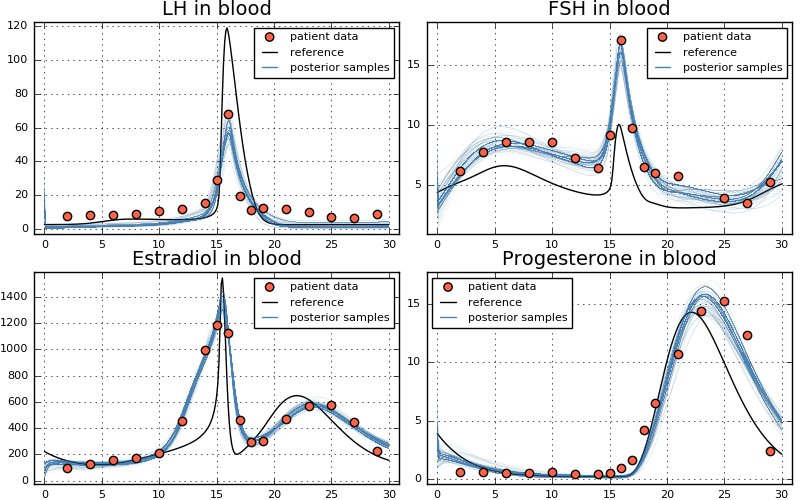


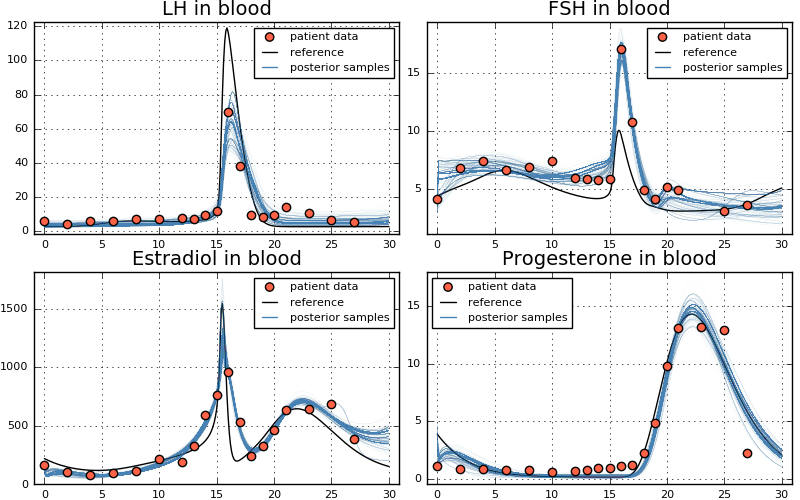

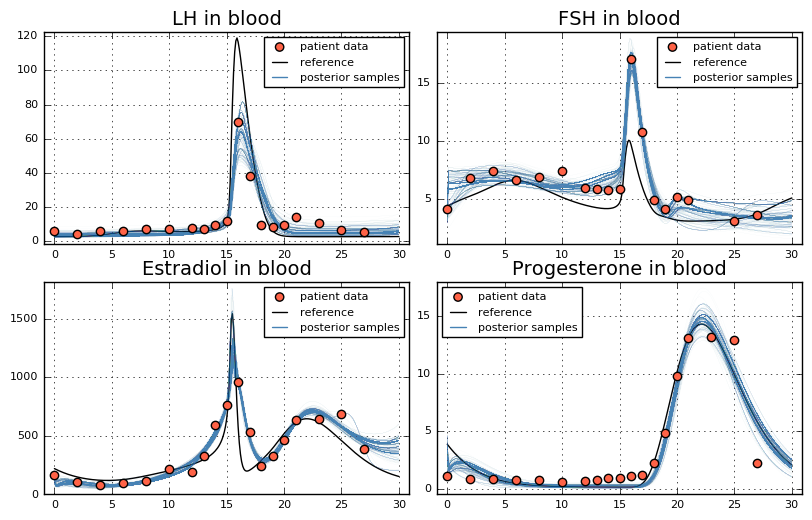

2-element Array{Void,1}:
 nothing
 nothing

In [9]:
plotn = 1000
prior = JLD.load("merged.jld", "w")

xrange  = 0:1/10:30

meascol = colorant"tomato"
refcol = colorant"black"

postcol = colorant"mediumaquamarine"
ppostcol = colorant"steelblue"

plotsize=(800, 500)

factors=[1,1,3.6712,1]

map([8, 23]) do patient
  s = load("../data/batch/pl$(patient)s0.1r0.125t100atrue.jld")
  n = size(s.samples, 1)
  samplerange = 20_000:div(n,plotn):n;
    
  plots = []
  
  post=deepcopy(prior)
  post.likelihoods = reshape(post.likelihoods[:,patient], size(post.likelihoods,1), 1)
  emiteration!(post)

  samples = GynC.sample(post, plotn)
  samplesols = [GynC.gync(samples[i,:]|>vec, xrange)[:, GynC.measuredinds] for i in 1:plotn]

  for spec = 1:4
    p = Plots.plot()#size=plotsize)
    plotdata(s, spec, p=p, ms=6, label="patient data", color=meascol)
    plot!(xrange, GynC.referencesolution(step(xrange))[:,GynC.measuredinds[spec]] * factors[spec], label="reference", legend=true, color=refcol)

    #plotsolutions(s[samplerange, :], spec, x=xrange, p=p, color=postcol, width=0.1, alpha=0.2, label="")
    #plot!([NaN],label="posterior sample",color=postcol) 

    #traj = hcat(Vector{Float64}[GynC.gync(samples[i,:]|>vec, xrange)[:, GynC.measuredinds[spec]]|>vec for i in 1:size(samples,1)]...);
    traj = [sol[:, spec]|>vec for sol in samplesols]
    plot!(xrange, traj, color=ppostcol, width=0.1, alpha=0.1, label="")
    plot!([NaN],label="posterior samples",color=ppostcol)
    push!(plots, p)
  end
  p = plot(plots..., layout=4, size=plotsize) 
  display(p)
end

In [203]:
#=let s = s[plotrange,:]# jumpsize plot
  p = plot()
  for i = [1,8,50,90,110]
      u=unique(s.samples[:,i]) 
      x = map(x->findfirst(s.samples[:,i], x), u)
      v = (u[2:end] - u[1:end-1]) ./ s.samples[1,i]
      scatter!(x, v, label=i, m=(3,stroke(0)))
  end
  p
end
=#


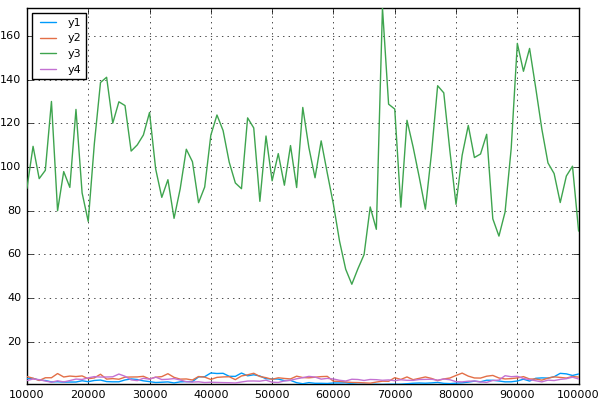

In [204]:
plot(plotrange, (s.samples[plotrange, :] #=./ s.samples[1,:]=#)[:,82+[2,7,24,25]])


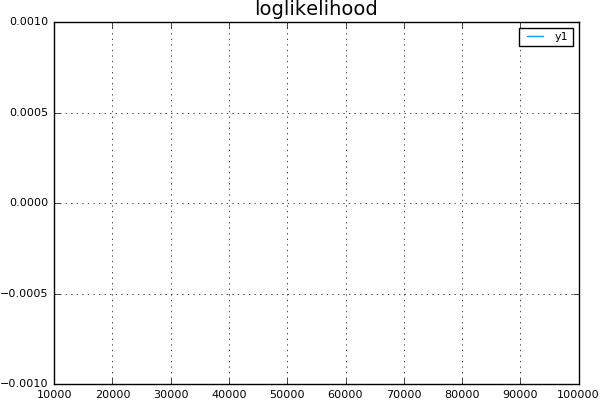

In [217]:
plot(plotrange, [GynC.llh(s.config, s.samples[i,:]|>vec) for i in plotrange], title="loglikelihood") 